선형회귀
==
다루는 내용
--
- 머신러닝 개념
- 경사하강법

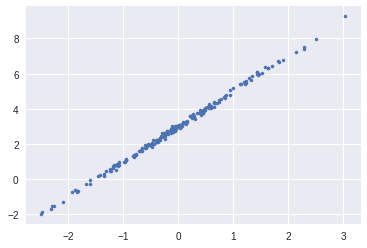

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

n_samples = 200
x = np.random.randn(n_samples)

# 계수 및 절편
w = 2
b = 3
# 노이지 
y = w*x + b + 0.1*np.random.randn(n_samples)
plt.scatter(x,y, s=10)

In [29]:
np.corrcoef(x,y)

array([[1.        , 0.99853908],
       [0.99853908, 1.        ]])

In [27]:
from sklearn.linear_model import LinearRegression
leg = LinearRegression() # (1)선택
leg.fit(x.reshape(-1,1), y) #(2)학습

print(leg.coef_)
print(leg.intercept_)

[2.04559977]
2.9406464955992684


In [10]:
x = np.arange(12)
x


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [13]:
#x.reshape(-1,1) # -1은 개수는 모름
x.reshape(2,3,2) # rank가 3인 tensor

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]]])

변수가 2개인 경우
--

In [21]:
n_samples = 200
x1 = np.random.randn(n_samples)
x2 = np.random.randn(n_samples)

y = 2000 * x1 + 3 * x2 + 4 + 3*np.random.randn(n_samples)

leg = LinearRegression()
X = pd.DataFrame({'x1':x1, 'x2':x2})
leg.fit(X, y)

print(leg.coef_)
print(leg.intercept_)

[1999.97462539    3.04758239]
4.253702379197975


In [22]:
leg.score(X,y) #회귀분석은 R square

0.9999980539890211

경사하강법
--

In [23]:
num_epoch = 10
lr = 1.0 # 3.0 #발산

w1 = np.random.uniform()
w2 = np.random.uniform()
b = np.random.uniform()

for epoch in range(num_epoch):
    y_pred = w1*x1 + w2*x2 + b
    error = np.abs(y_pred - y).mean() #배치사이즈
    print(f"{epoch:2} w1 = {w1:.6f},  w2 = {w2:.6f}, b = {b:.6f} , error = {error:.6f}")

    w1 = w1 - lr*((y_pred - y)* x1).mean()
    w2 = w2 - lr*((y_pred - y)* x2).mean()
    b = b - lr*((y_pred - y)).mean()

 0 w1 = 0.433973,  w2 = 0.755502, b = 0.959172 , error = 1615.898086
 1 w1 = 2097.481438,  w2 = 169.421970, b = -37.811298 , error = 166.756348
 2 w1 = 1980.597030,  w2 = -39.582387, b = -30.190669 , error = 55.030823
 3 w1 = 2003.703923,  w2 = 23.434495, b = 13.198711 , error = 21.405127
 4 w1 = 1998.300628,  w2 = -4.592660, b = -0.141956 , error = 8.762542
 5 w1 = 2000.593225,  w2 = 6.162705, b = 5.895144 , error = 4.143787
 6 w1 = 1999.722310,  w2 = 1.815841, b = 3.583083 , error = 2.693795
 7 w1 = 2000.074309,  w2 = 3.539995, b = 4.518705 , error = 2.415137
 8 w1 = 1999.934767,  w2 = 2.851507, b = 4.147737 , error = 2.321789
 9 w1 = 1999.990495,  w2 = 3.125769, b = 4.295894 , error = 2.330901


In [24]:
leg.score(X,y)

0.9999980539890211